# Comparison of topic models for repeated runs of the same configuration

Topic models are generated by a random process.  Here we try to evaluate how the results differ for several runs with the same configuration.  In this case, 10 runs have been made.

* document length varies, average is 250 tokens
* 80 topics
* automatic re-evaluation of alpha and eta values
* 2000 iterations with 5 passes over the corpus
* Tokenization using mmseg with a dictionary of frequently used terms of Classical Chinese (ca 3600 entries of 2 or more characters) and the character frequencies of the Kanseki Repository

## Labels for the models

Every run has a serial number that identifies its result, these are used as labels.

## Evaluation points

1. Topic term table
2. Distribution of alpha values
3. Cooccurrence of tokens in the top 20 topic terms
4. Topics for term
5. Document by similarity


In [1]:
from IPython.core.display import display, HTML
import ktm_analysis as ktm
import numpy as np
import matplotlib.pyplot as plt
target="rep_gensim"
models = ktm.prepan(target)
display(HTML("<h1>1. Topic term table</h1>"))
display(HTML("<p>Topic terms of all models, arranged by descending alpha value</p>"))
display(HTML(ktm.topic_terms_table(models, html=True)))

65,0.0329,賊 戰 衆 餘 城 撃 出 攻 走 敗,45,0.0344,書 郎 侍 部 尚 戸 吏 門 官 司,53,0.0454,城 戰 攻 賊 衆 撃 敗 出 餘 守,13,0.0368,書 侍 郎 部 平 尚 同 門 戸 兼,35,0.0309,陛下 相 今 天 朕 欲 必 知 日 宰,55,0.0350,陛下 今 天 能 必 心 知 相 豈 用,50,0.0314,今 必 欲 心 相 陛下 知 天 能 朝,74,0.0356,城 衆 戰 出 餘 數 撃 入 引 敗,2,0.0361,侍 書 郎 部 尚 門 戸 同 司 罷,79,0.0261,甲午 蘇州 庚申 辛酉 奉天 乙巳 盧龍 乙未 立 己酉
47,0.0283,相 宰 諫 知 議 能 用 論 官 宜,20,0.0320,南詔 朔 日 思明 仙芝 食 官 庚申 秋 滉,42,0.0297,刺 貶 司 薨 平 徐州 校 檢 甲寅 癸丑,42,0.0290,后 薨 皇 正 春 立 稹 甲寅 許州 改,20,0.0295,郎 侍 同 章 部 戸 門 書 充 吏,72,0.0305,平 章 同 朔 日 忠武 食 甲子 薨 庚子,5,0.0303,書 部 侍 郎 尚 門 兼 同 令 戸,19,0.0303,部 郎 書 侍 章 平 尚 戸 加 兼,15,0.0297,今 陛下 能 天 用 國 時 多 必 安,24,0.0248,今 公 天 必 能 欲 陛下 安 日 心
43,0.0281,陛下 今 天 朕 日 欲 豈 見 安 恐,17,0.0294,春 正 討 招 黨 辛巳 安南 項 辛亥 校,11,0.0291,留 後 守 乙巳 辛酉 安南 癸卯 甲辰 稹 乙丑,2,0.0285,陛下 今 欲 天 已 必 相 知 日 朕,43,0.0292,今 天 能 必 王 心 尹 用 國 時,21,0.0298,侍 書 郎 部 同 兼 尚 門 罷 僕,30,0.0299,正 春 車 駕 朔 日 食 甲午 迎 夏,24,0.0265,陛下 今 欲 朕 天 國 必 心 豈 君,7,0.0278,正 春 朔 温 日 食 丙申 大梁 稹 冬,18,0.0248,陛下 知 諫 今 能 必 失 心 天 用
41,0.0254,部 書 郎 尚 侍 戸 吏 司 御 丞,22,0.0255,撃 餘 破 衆 斬 敗 攻 戰 屯 等,51,0.0281,朔 食 日 冬 温 戊寅 乙亥 山南東道 辛丑 秋,29,0.0276,城 衆 戰 走 撃 敗 引 攻 數 賊,61,0.0280,泚 稹 蘇州 己亥 辛亥 壬子 廬州 刺 等 滉,64,0.0285,南詔 總 管 盧龍 蘇州 癸巳 廬州 副 仙芝 僕,0,0.0277,城 賊 出 衆 餘 戰 攻 走 數 守,8,0.0247,留 後 薨 知 昌 魏博 宣武 鎭 代 昭義,1,0.0278,貶 司 夏 刺 庚申 流 死 監 丁卯 坐,30,0.0247,城 攻 戰 撃 敗 引 克用 餘 出 騎
4,0.0240,討 行 招 刺 淮南 營 朱全忠 荊南 總 全忠,48,0.0254,陛下 朕 諫 相 能 議 今 必 宰 知,66,0.0265,同 侍 郎 章 部 平 書 加 門 兼,4,0.0262,諫 相 議 官 奏 論 宰 尹 理 法,8,0.0259,平 司 加 冬 馬 章 辛未 庚辰 空 戊子,31,0.0249,春 正 車 駕 甲寅 山南東道 山南西道 幸 是歳 鎔,75,0.0251,刺 都 督 州 楊行密 錢鏐 壬子 置 行密 己酉,12,0.0240,泚 盧龍 稹 謀 横海 誅 滉 反 元忠 瑄,66,0.0261,城 攻 拔 守 救 圍 克 撃 引 降,43,0.0246,賊 戰 守 城 攻 衆 數 巣 圍 撃
11,0.0238,平 章 同 加 侍 郎 充 書 罷 門,78,0.0253,平 同 章 僕 射 加 罷 門 書 丁卯,64,0.0255,正 春 赦 天 改 壬申 丹 癸未 甲午 甲戌,51,0.0258,司 僕 射 馬 平 府 同 戊戌 壬辰 空,16,0.0245,書 尚 平 令 宦官 部 同 相 兼 宰,71,0.0231,冬 校 温 臺 幸 檢 辛酉 甲辰 員外 河南,41,0.0241,天 文 官 時 能 禮 行 明 後 或,45,0.0231,同 平 門 校 侍 檢 品 書 郎 壬子,61,0.0252,相 諫 宰 朕 陛下 議 士 知 問 學,46,0.0242,章 平 京兆 東都 辛未 丙寅 壬申 庚午 荊南 滉
2,0.0231,八 副 徐 鎭 壬子 徐州 盧龍 甲申 壬午 領,66,0.0246,城 攻 圍 救 賊 守 引 食 降 焚,22,0.0246,書 尚 部 僕 平 射 令 罷 丞 兼,62,0.0232,討 行 副 都 營 招 充 總 統 管,21,0.0229,衆 賊 帥 走 守 殺 城 入 士 等,79,0.0227,官 宰 相 府 議 練 令 職 時 奏,65,0.0236,平 章 同 侍 郎 罷 司 門 西川 鎭海,17,0.0229,錢 緡 財 僧 數 餘 費 減 用 歳,73,0.0246,公 汝 我 欲 入 見 日 指 召 謀,5,0.0238,河東 運 校 州 轉 檢 置 山南東道 山南西道 兼
50,0.0226,校 冬 檢 乙亥 丁酉 封 癸卯 室 王 弟,55,0.0240,河東 淮南 蠻 蜀 州 縣 西川 成都 山南西道 八,56,0.0238,諫 奏 議 官 宦官 政 朝 疏 聽 遺,48,0.0231,章 同 希烈 甲戌 荊南 閏 紳 西川 侍 諷,9,0.0226,刺 貶 觀 馬 乙卯 州 湖南 辛丑 河西 癸酉,59,0.0225,加 御 丞 書 官 稹 尚 宰 壬戌 政,1,0.0225,建 冬 茂貞 鳳翔 李茂貞 王建 丁酉 己亥 韓建 京師,4,0.0228,河東 請 河中 表 許 詔 鎭 復 滔 辛卯,36,0.0244,都 行 副 充 討 總 管 營 督 ‧,47,0.0237,書 尚 部 相 宰 令 官 吏 罷 奏
16,0.0221,攻 克用 行密 救 李克用 刺 朱全忠 楊行密 王建 屯,23,0.0237,公 指 欲 揮 相 今 心 且 復 歸,17,0.0223,囘 衆 紇 牙 歸 等 帥 陀 沙 朔方,66,0.0225,赦 天 冬 號 改 宮 夏 羣 請 乙巳,3,0.0226,御 權 出 奏 内 侍 殿 相 宮 等,73,0.0217,戰 賊 騎 走 敗 撃 數 衆 死 乘,77,0.0222,討 行 營 招 河陽 都 破 鎭 統 東川,79,0.0226,正 春 朔 秋 日 改 食 天 甲子 冬,50,0.0238,戰 撃 衆 敗 餘 騎 破 斬 數 出,71,0.0237,民 士 縣 尹 經 多 年 或 財 數
69,0.0220,丹 契 鎔 承宗 奚 常侍 戊寅 滉 長 瑄,34,0.0228,用 制 天 供 朝 數 廷 遺 年 官,16,0.0220,戸 判 充 支 巡 罷 平 部 官 奏,39,0.0225,賊 江 淮 運 巣 轉 鐵 攻 道 柵,52,0.0225,都 討 招 督 統 置 等 帥 長 行,42,0.0214,今 欲 陛下 死 父 日 天 我 公 召,7,0.0215,留 後 馬 知 命 魏博 虞 雄 士 勛,21,0.0224,朝 廷 權 相 知 宰 表 功 奏 必,46,0.0228,平 章 同 加 西川 東川 郎 王鐸 鳳翔 邛州,58,0.0237,衆 城 掠 餘 士 帥 殺 數 卒 降
53,0.0218,寇 破 撃 防 禦 突 黨 厥 餘 奏,47,0.0228,謀 殺 告 反 死 相 奏 密 等 知,43,0.0210,錢 蜀 給 緡 餘 民 府 時 盜 多,28,0.0220,幽州 南詔 甲子 ‧ 盧龍 等 辛巳 領 丙戌 璘,27,0.0223,副 鹽 温 總 管 衞 夏 兼 行 州,18,0.0213,都 督 統 討 副 馬 大梁 營 幽州 等,51,0.0211,全忠 攻 克用 朱全忠 李克用 刺 拔 救 撃 敗,65,0.0221,士 學 官 府 翰林 藩 鎭 州 制 給,57,0.0219,勢 必 城 守 今 且 請 留 援 欲,11,0.0228,留 後 王建 東川 西川 鳳翔 戊戌 己丑 戊申 辛卯


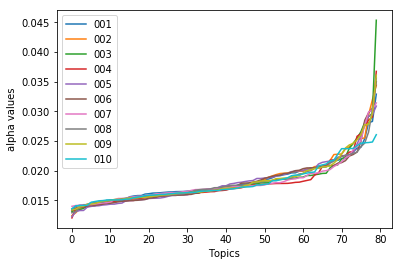

In [2]:
display(HTML("<h1>2. Distribution of alpha values</h1>"))
for m in models:
    lda=m[0]
    alpha=np.sort(lda.alpha)
    plt.plot(alpha)
plt.ylabel('alpha values')
plt.xlabel('Topics')
plt.legend([m[5] for m in models], loc='upper left')
plt.show()

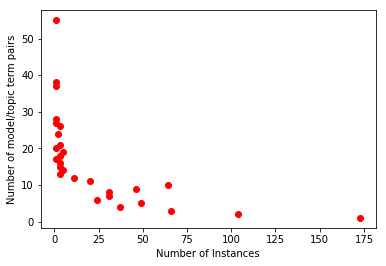

In [3]:
num_words = 20
display(HTML("<h1>3. Cooccurrence of tokens in the top %d topic terms</h1>" % (num_words)))
co=ktm.tab_co_list(ktm.get_tt_co(models, num_words=num_words))
plt.plot(co[1], co[0], 'ro')
plt.ylabel('Number of model/topic term pairs')
plt.xlabel('Number of Instances')
plt.show()

In [4]:
term= u"平"
display(HTML("<h1>4. Topics for term %s</h1>" % (term)))
ktm.topics_for_term(models, term)

[('001', [(11, 0.17273006466738369)]),
 ('002', [(78, 0.17484362116953131)]),
 ('003',
  [(11, 0.016817782382582483),
   (16, 0.022807711507685752),
   (22, 0.046244846728880587),
   (42, 0.022725836721916061),
   (66, 0.042926100564418868)]),
 ('004',
  [(13, 0.051626994831467661),
   (51, 0.032006909190927184),
   (58, 0.046336325288511657)]),
 ('005',
  [(8, 0.12349559334386154),
   (13, 0.018454361702451863),
   (16, 0.045540853656770998),
   (38, 0.013116750933610455)]),
 ('006', [(21, 0.014608856003858656), (72, 0.16888390600620373)]),
 ('007', [(65, 0.18220051097266765)]),
 ('008',
  [(19, 0.059693191331695879),
   (40, 0.043001513642311029),
   (45, 0.056024422952495899)]),
 ('009', [(46, 0.20331496148839548)]),
 ('010',
  [(46, 0.22519723945209691),
   (49, 0.035049988904554998),
   (68, 0.014074571677799283)])]

In [5]:
res=ktm.get_simdocs(models, 3)
display(HTML("<h1>5. Document by similarity</h1>"))
display(HTML("<p>%s</p>" % ("<p>\n".join(ktm.print_simdocs(res, html=True)))))